# Recommended Analysis

1. What does the distribution of films look like by rating? My primary genre? (hint: use the first genre listed)

2. What % of films received a Certified Fresh Tomatometer rating? What about Rotten?

3. Explore new film releases over time. How has the volume of releases by month trended over time? What year/month were the newest films released?

4. Compare average Tomatometer ratings by Studio. Which studios produce the highest-rated films, on average? The lowest?

5. Compare the Tomatometer ratings against audience ratings. Which films showed the largest discrepancies between audiences and critics?

6. Explore the critic's consensus rating: what language is used most often?


In [2]:
#Importing needful libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Reading file through read_csv method

df = pd.read_csv("/kaggle/input/movies-data/Rotten Tomatoes Movies 2.csv")
df

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0,68860.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16633,Zoot Suit,"Based on a 1940s Los Angeles murder trial, thi...",NaN,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,2003-05-27,104.0,MCA Universal Home Video,Rotten,56,9,74.0,1192.0
16634,Zootopia,The modern mammal metropolis of Zootopia is a ...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",2016-03-04,2016-06-07,108.0,Walt Disney Animation Studios,Certified Fresh,97,279,92.0,100946.0
16635,Zorba the Greek,If ever there was a role that Anthony Quinn wa...,NaN,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1964-12-17,2004-08-03,142.0,Fox,Fresh,78,9,87.0,7126.0
16636,Zulu,"Filmed on a grand scale, Zulu is a rousing rec...",NaN,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,2001-02-02,139.0,Paramount Pictures,Fresh,95,21,91.0,30170.0


In [4]:
#Getting info of dataset like non-null count, datatype and column etc

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         16638 non-null  object 
 1   movie_info          16614 non-null  object 
 2   critics_consensus   8309 non-null   object 
 3   rating              16638 non-null  object 
 4   genre               16621 non-null  object 
 5   directors           16524 non-null  object 
 6   writers             15289 non-null  object 
 7   cast                16354 non-null  object 
 8   in_theaters_date    15823 non-null  object 
 9   on_streaming_date   16636 non-null  object 
 10  runtime_in_minutes  16483 non-null  float64
 11  studio_name         16222 non-null  object 
 12  tomatometer_status  16638 non-null  object 
 13  tomatometer_rating  16638 non-null  int64  
 14  tomatometer_count   16638 non-null  int64  
 15  audience_rating     16386 non-null  float64
 16  audi

In [5]:
#To get the name of all columns

df.columns

Index(['movie_title', 'movie_info', 'critics_consensus', 'rating', 'genre',
       'directors', 'writers', 'cast', 'in_theaters_date', 'on_streaming_date',
       'runtime_in_minutes', 'studio_name', 'tomatometer_status',
       'tomatometer_rating', 'tomatometer_count', 'audience_rating',
       'audience_count'],
      dtype='object')

In [6]:
#To describe mathmetical values/expressions like count, max, min, mean etc. 

df.describe()

,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
count,16483.000000,16638.000000,16638.000000,16386.000000,1.638600e+04
mean,102.391494,60.466522,56.607104,60.470829,1.524797e+05
std,25.028011,28.587230,66.383800,20.462368,1.817736e+06
min,1.000000,0.000000,5.000000,0.000000,5.000000e+00
25%,90.000000,38.000000,12.000000,45.000000,8.642500e+02
50%,99.000000,66.000000,28.000000,62.000000,4.876500e+03
75%,111.000000,86.000000,76.000000,77.000000,2.875200e+04
max,2000.000000,100.000000,497.000000,100.000000,3.579764e+07


**Let's have a look on relevant question.**

# 1. What does the distribution of films look like by rating? My primary genre? (hint: use the first genre listed)

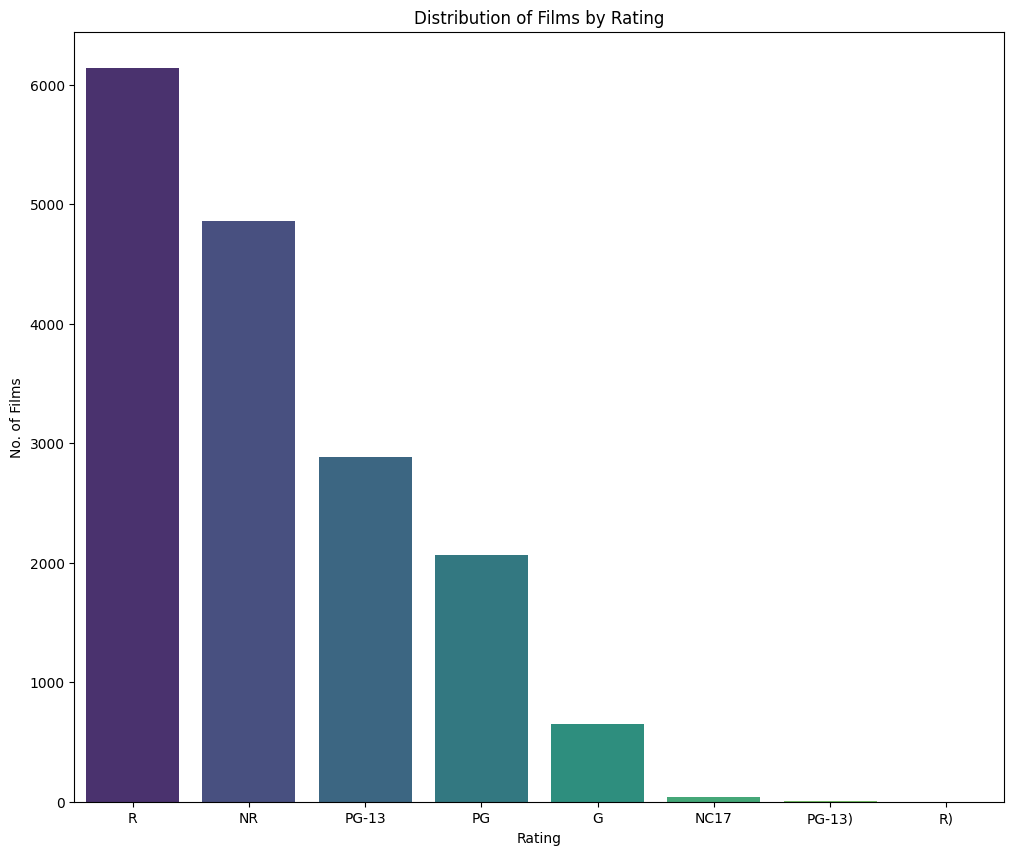

In [23]:
# Assuming 'rating' and 'genre' are the columns

plt.figure(figsize=(12, 10))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index, palette='viridis')
plt.title('Distribution of Films by Rating')
plt.xlabel('Rating')
plt.ylabel('No. of Films')
plt.show()

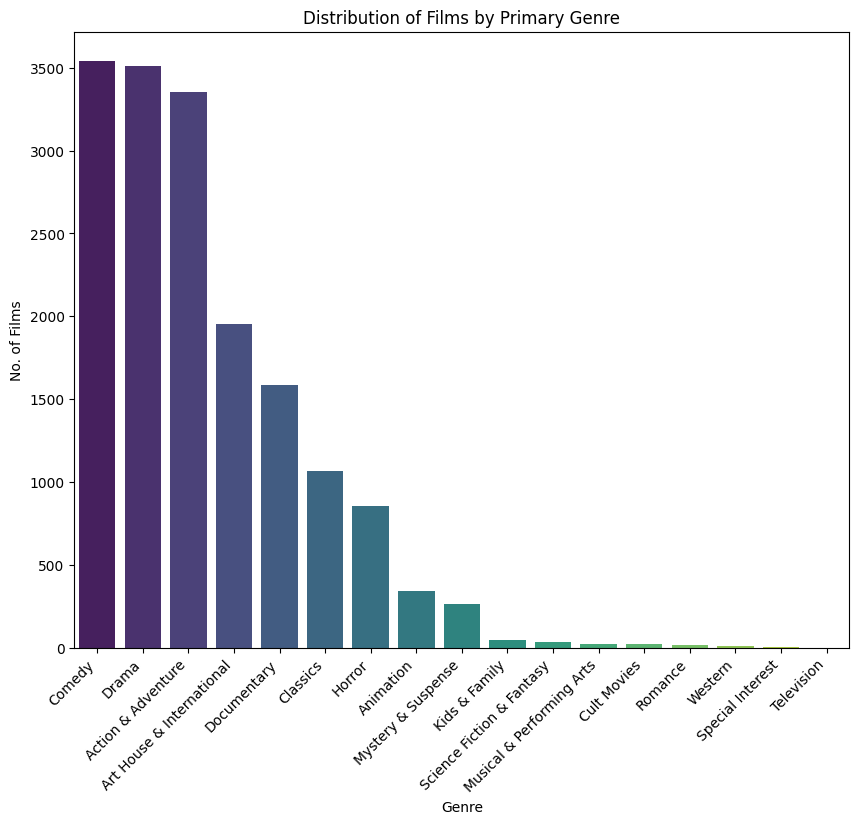

In [25]:
#For the primary genre (assuming the first genre listed in 'genre') 

plt.figure(figsize=(10, 8))
primary_genre = df['genre'].str.split(',').str[0]
sns.countplot(x=primary_genre, data=df, order=primary_genre.value_counts().index, palette='viridis')
plt.title('Distribution of Films by Primary Genre')
plt.xlabel('Genre')
plt.ylabel('No. of Films')
plt.xticks(rotation=45, ha='right')
plt.show()

# 2. What % of films received a Certified Fresh Tomatometer rating? What about Rotten?

In [27]:
certified_fresh_percentage = (df['tomatometer_status'] == 'Certified Fresh').mean() * 100
rotten_percentage = (df['tomatometer_status'] == 'Rotten').mean() * 100

print(f"Percentage of films with Certified Fresh rating: {certified_fresh_percentage:.2f}%")
print(f"Percentage of films with Rotten rating: {rotten_percentage:.2f}%")

Percentage of films with Certified Fresh rating: 17.77%
Percentage of films with Rotten rating: 43.47%


# 3. Explore new film releases over time. How has the volume of releases by month trended over time? What year/month were the newest films released?

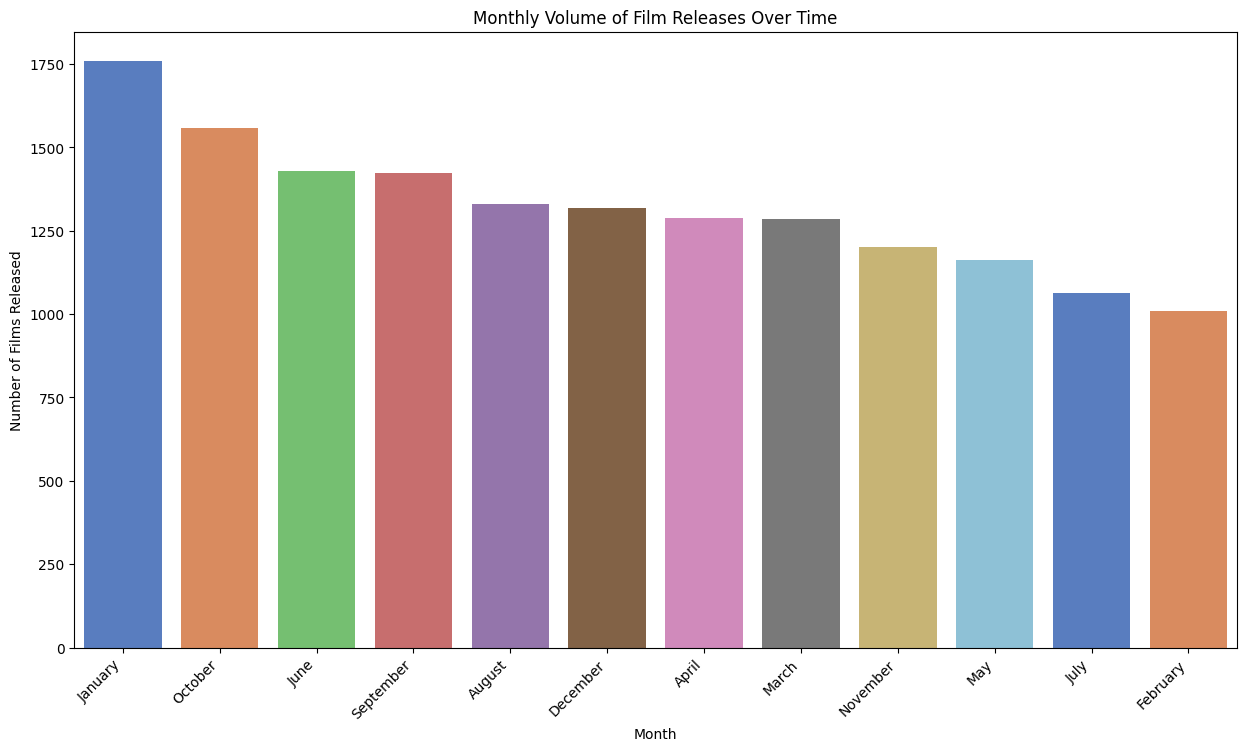

In [14]:
#Assuming 'in_theaters_date' is in datetime format

df['in_theaters_date'] = pd.to_datetime(df['in_theaters_date'])
df['release_month'] = df['in_theaters_date'].dt.month_name()
plt.figure(figsize = (15, 8))
sns.countplot(x='release_month', data = df, order = df['release_month'].value_counts().index, palette = 'muted')
plt.title('Monthly Volume of Film Releases Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Films Released')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [16]:
newest_films = df[df['in_theaters_date'] == df['in_theaters_date'].max()]
print("Newest films were released in:")
print(newest_films[['movie_title', 'in_theaters_date']])

Newest films were released in:
       movie_title in_theaters_date
14859  The Silence       2019-12-07


# 4. Compare average Tomatometer ratings by Studio. Which studios produce the highest-rated films, on average? The lowest?

/tmp/ipykernel_33/228105741.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='tomatometer_rating', y='studio_name', data=df, ci=None, palette='coolwarm')


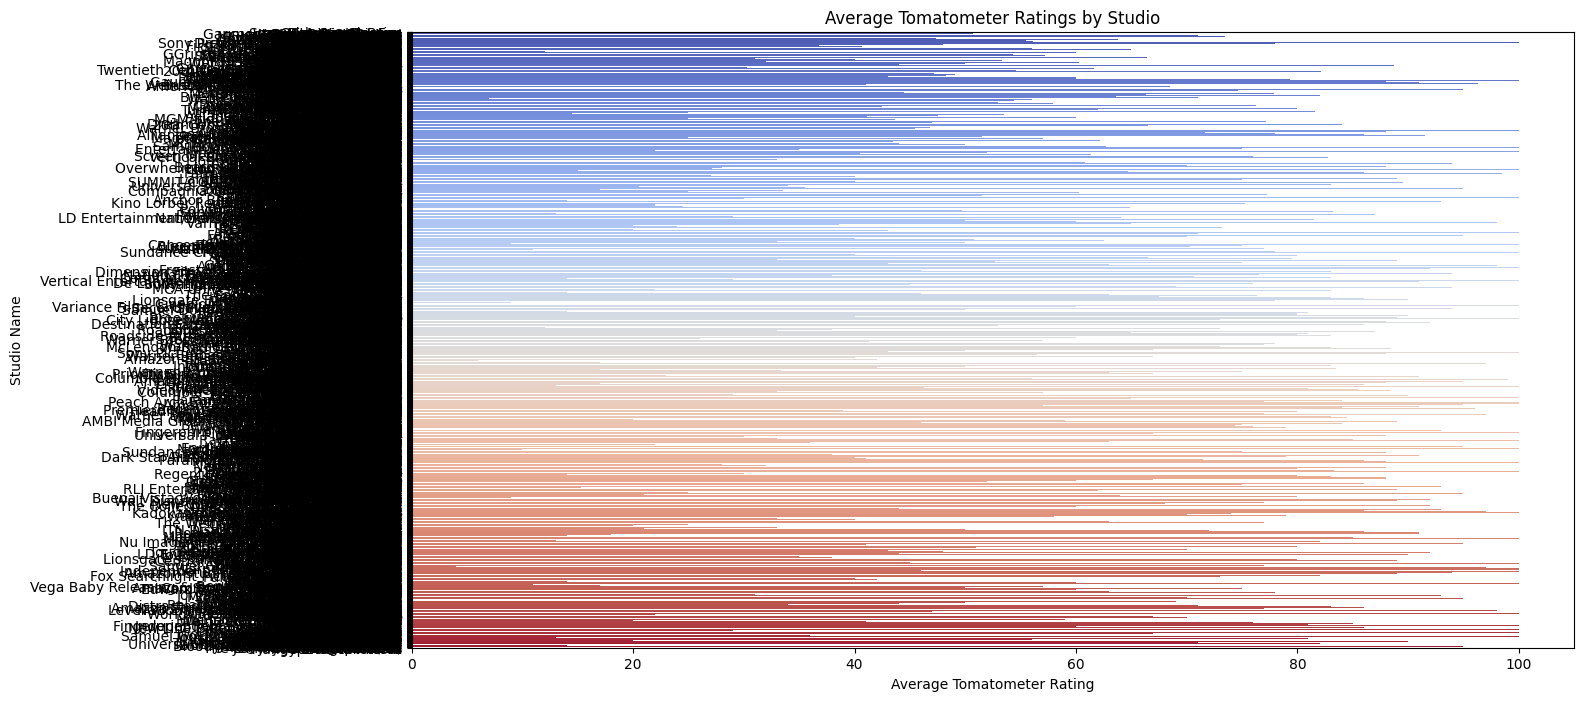

In [18]:
plt.figure(figsize=(15, 8))
sns.barplot(x='tomatometer_rating', y='studio_name', data=df, ci=None, palette='coolwarm')
plt.title('Average Tomatometer Ratings by Studio')
plt.xlabel('Average Tomatometer Rating')
plt.ylabel('Studio Name')
plt.show()

# 5. Compare the Tomatometer ratings against audience ratings. Which films showed the largest discrepancies between audiences and critics?

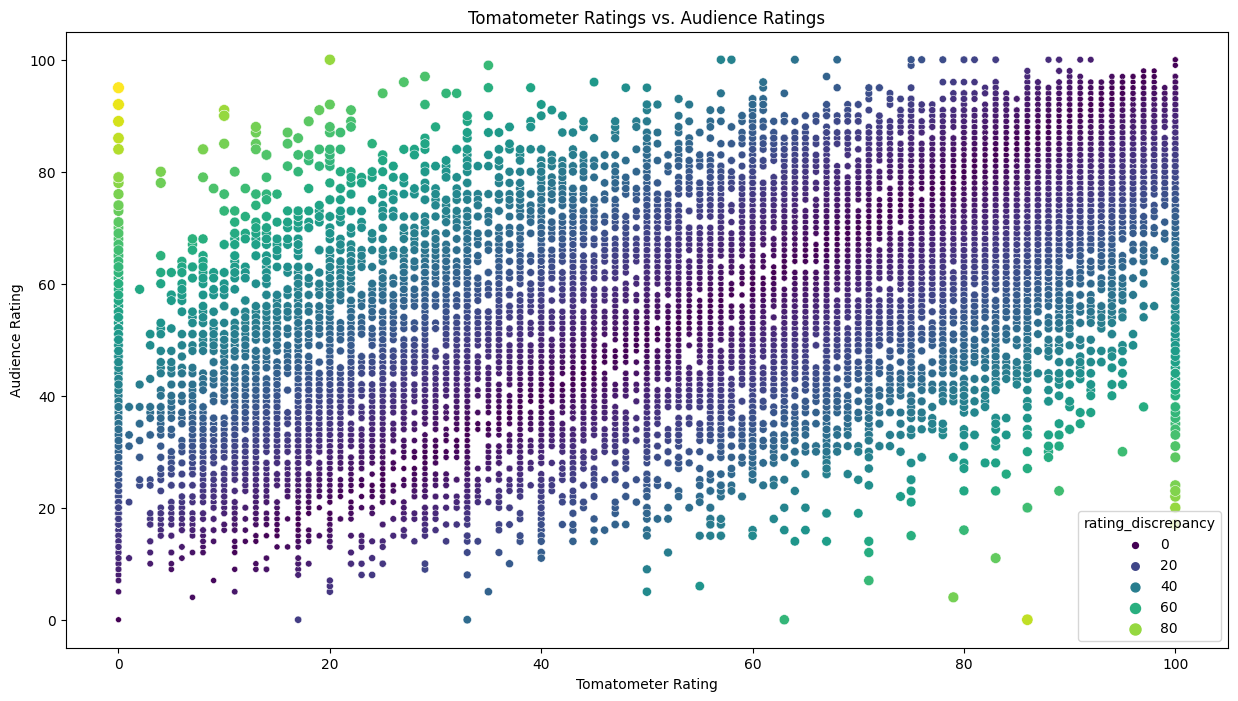

In [28]:
df['rating_discrepancy'] = abs(df['tomatometer_rating'] - df['audience_rating'])
plt.figure(figsize=(15, 8))
sns.scatterplot(x='tomatometer_rating', y='audience_rating', hue='rating_discrepancy', data=df, palette='viridis', size='rating_discrepancy')
plt.title('Tomatometer Ratings vs. Audience Ratings')
plt.xlabel('Tomatometer Rating')
plt.ylabel('Audience Rating')
plt.show()

# 7. Explore the critic's consensus rating: what language is used most often?

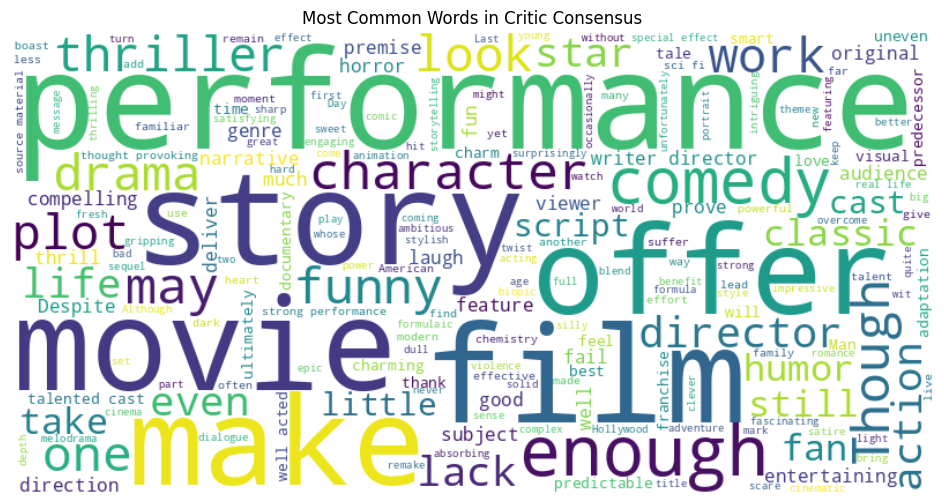

In [22]:
from wordcloud import WordCloud
consensus_text = ' '.join(df['critics_consensus'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(consensus_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Critic Consensus')
plt.show()